# Management and Analysis of Physics Dataset - mod. B

### Davide Maniscalco, Gianmarco Pompeo

***



## Session II

### PART A

**Describe in a schematic way the GRID and the Cloud layers in a distributed system commenting on the differences. (max 1 page)**

> The term GRID refers to a distributed computing architecture where machines from different locations are connected to each others and share resources in order to achieve a common goal. The interconnection between these machines makes it possible for the whole system to have much higher computational capabilities while at the same time not requiring hardware that may be too expensive.
The GRID is a set of code that works on several layers. The **fabric layer** combines the set of hardware resources, networks and code repositories that in a way constitute the physical backbone of the GRID itself. The **connectivity layer**, on the other hand, is a software layer where communication and authentication protocols are implemented; authentication and authorization are in fact key factors for an efficient exploitation of this architecture, which is why it is crucial to devolve a layer for security and traceability of operations. In the **resource layer**, again a software one, more specific protocols are defined: procedures such as publication of data and access to it, prioritization of the jobs, monitoring of the resources that are being used and even payment for the services are handled. Interactions between GRID resources are dealt with in the **collective layer**, which is of crucial importance in combining all together those services that are not necessarily specific to a single resource. Finally, the **application layer** is where any user application built on top of the mentioned protocols resides: in a way, it is the software that allows individual access to the GRID.
>
> In parallel with the development of the GRID especially in the scientific field, also the concept of Cloud came about. Clouds are large pools of computing or storage resources which can be accessed via standard protocols (for example, the Internet) through an abstract interface: in a way they are the commercial answer to the GRID. Clouds are usually composed of 4 layers and in some cases they have a broad difference with the GRID architecture. The first one is the **fabric** and it is basically the same as the one in the GRID, as also the hardware components do not differ extensively. Then, there is the **unified resource layer**, which contains resources that have been abstracted and prepared for high level applications. In contrast with the GRID, resources are managed centrally and they are virtualized and integrated between them, without the need of a dedicated layer for this purpose (like the connectivity layer in the GRID). Afterwards, the **platform layer** can be found, which provides the user with a development platform and where the middleware is located, enabling communication and management of data; in the Cloud resources are in fact provided according to the user requirements (_on-demand_), while in the GRID machines are just assigned one of the subtasks in which the main task gets divided. The last layer of the Cloud is the **application layer**, containing the end-software running in the cloud itself, not unlike its GRID corresponding.
>
> The differences we have highlighted so far are the ones mainly pertaining to the layers in which the two entities are divided, so mostly related to their architecture. While other significant discrepancies do exist (just to cite an example, the GRID resources are distributed, while the Cloud is a client-server structure) it should be kept in mind that these are not two completely separate worlds. Actually, thanks to some of the most recent technological developments, experts are trying to move the GRID to the Cloud, employing high-speed networks that make data locality a less stringent requirement or storing data in _datalakes_, large and flexible storage units. 

### PART B

#### Point (1)
**Create your cluster with fixed number of workers, equal to 2.**

As preliminary operations, in a terminal window we run the command `dask-scheduler`, we retrieve the Client name and, in a different window, we run `dask-worker 10.190.1.68:8786 --nprocs 2`, where 10.190.1.68 is the client number and the option `--nprocs` indicates how many workers we are employing (at this time, 2 of them and without creating a multiple-machine cluster).


In [1]:
from dask.distributed import Client

client = Client("10.190.1.68:8786")
client

Client Scheduler: tcp://10.190.1.68:8786 Dashboard: http://10.190.1.68:8787/status,Cluster Workers: 2 Cores: 4 Memory: 8.15 GB


We now import all the packages that we will need throughout our analysis.

In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import dask_ml

from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import MinMaxScaler
from dask_ml.wrappers import Incremental
from sklearn.neural_network import MLPClassifier
from dask_ml.wrappers import ParallelPostFit
from timeit import default_timer as tic

%matplotlib inline

Below, we start the clock to measure the total running time of our Notebook; this will be used later on for comparison purposes when building a cluster of machines.

In [3]:
tstart = tic()

#### Point (2)
**Load the remote dataset available at the link.**

We now create a DASK dataframe by remotely accessing a dataset containing handwritten characters from a to z; the images consist of an array in which each column contains a pixel value of a 28x28 image in grayscale format.

In [4]:
df = dd.read_csv("https://www.dropbox.com/s/75aqeywzxsu6hqt/dataset_sampled_handwritten.csv?dl=1")

df.head()  #just to explore the dataset

,letter,label,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,t,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,e,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df

,letter,label,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,pixel_64,pixel_65,pixel_66,pixel_67,pixel_68,pixel_69,pixel_70,pixel_71,pixel_72,pixel_73,pixel_74,pixel_75,pixel_76,pixel_77,pixel_78,pixel_79,pixel_80,pixel_81,pixel_82,pixel_83,pixel_84,pixel_85,pixel_86,pixel_87,pixel_88,pixel_89,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,pixel_100,pixel_101,pixel_102,pixel_103,pixel_104,pixel_105,pixel_106,pixel_107,pixel_108,pixel_109,pixel_110,pixel_111,pixel_112,pixel_113,pixel_114,pixel_115,pixel_116,pixel_117,pixel_118,pixel_119,pixel_120,pixel_121,pixel_122,pixel_123,pixel_124,pixel_125,pixel_126,pixel_127,pixel_128,pixel_129,pixel_130,pixel_131,pixel_132,pixel_133,pixel_134,pixel_135,pixel_136,pixel_137,pixel_138,pixel_139,pixel_140,pixel_141,pixel_142,pixel_143,pixel_144,pixel_145,pixel_146,pixel_147,pixel_148,pixel_149,pixel_150,pixel_151,pixel_152,pixel_153,pixel_154,pixel_155,pixel_156,pixel_157,pixel_158,pixel_159,pixel_160,pixel_161,pixel_162,pixel_163,pixel_164,pixel_165,pixel_166,pixel_167,pixel_168,pixel_169,pixel_170,pixel_171,pixel_172,pixel_173,pixel_174,pixel_175,pixel_176,pixel_177,pixel_178,pixel_179,pixel_180,pixel_181,pixel_182,pixel_183,pixel_184,pixel_185,pixel_186,pixel_187,pixel_188,pixel_189,pixel_190,pixel_191,pixel_192,pixel_193,pixel_194,pixel_195,pixel_196,pixel_197,pixel_198,pixel_199,pixel_200,pixel_201,pixel_202,pixel_203,pixel_204,pixel_205,pixel_206,pixel_207,pixel_208,pixel_209,pixel_210,pixel_211,pixel_212,pixel_213,pixel_214,pixel_215,pixel_216,pixel_217,pixel_218,pixel_219,pixel_220,pixel_221,pixel_222,pixel_223,pixel_224,pixel_225,pixel_226,pixel_227,pixel_228,pixel_229,pixel_230,pixel_231,pixel_232,pixel_233,pixel_234,pixel_235,pixel_236,pixel_237,pixel_238,pixel_239,pixel_240,pixel_241,pixel_242,pixel_243,pixel_244,pixel_245,pixel_246,pixel_247,pixel_248,pixel_249,pixel_250,pixel_251,pixel_252,pixel_253,pixel_254,pixel_255,pixel_256,pixel_257,pixel_258,pixel_259,pixel_260,pixel_261,pixel_262,pixel_263,pixel_264,pixel_265,pixel_266,pixel_267,pixel_268,pixel_269,pixel_270,pixel_271,pixel_272,pixel_273,pixel_274,pixel_275,pixel_276,pixel_277,pixel_278,pixel_279,pixel_280,pixel_281,pixel_282,pixel_283,pixel_284,pixel_285,pixel_286,pixel_287,pixel_288,pixel_289,pixel_290,pixel_291,pixel_292,pixel_293,pixel_294,pixel_295,pixel_296,pixel_297,pixel_298,pixel_299,pixel_300,pixel_301,pixel_302,pixel_303,pixel_304,pixel_305,pixel_306,pixel_307,pixel_308,pixel_309,pixel_310,pixel_311,pixel_312,pixel_313,pixel_314,pixel_315,pixel_316,pixel_317,pixel_318,pixel_319,pixel_320,pixel_321,pixel_322,pixel_323,pixel_324,pixel_325,pixel_326,pixel_327,pixel_328,pixel_329,pixel_330,pixel_331,pixel_332,pixel_333,pixel_334,pixel_335,pixel_336,pixel_337,pixel_338,pixel_339,pixel_340,pixel_341,pixel_342,pixel_343,pixel_344,pixel_345,pixel_346,pixel_347,pixel_348,pixel_349,pixel_350,pixel_351,pixel_352,pixel_353,pixel_354,pixel_355,pixel_356,pixel_357,pixel_358,pixel_359,pixel_360,pixel_361,pixel_362,pixel_363,pixel_364,pixel_365,pixel_366,pixel_367,pixel_368,pixel_369,pixel_370,pixel_371,pixel_372,pixel_373,pixel_374,pixel_375,pixel_376,pixel_377,pixel_378,pixel_379,pixel_380,pixel_381,pixel_382,pixel_383,pixel_384,pixel_385,pixel_386,pixel_387,pixel_388,pixel_389,pixel_390,pixel_391,pixel_392,pixel_393,pixel_394,pixel_395,pixel_396,pixel_397,pixel_398,pixel_399,pixel_400,pixel_401,pixel_402,pixel_403,pixel_404,pixel_405,pixel_406,pixel_407,pixel_408,pixel_409,pixe

From above, it should be noted that the default number of partitions is 2.

#### Point (3)
**Count the number of examples for each alphabet character and plot them.**

We want to know the number of examples for each letter; we will also display the occurences in a barplot. It should be noted that since we are working in parallel and the dataframe is created with DASK, it is virtualized and the `.compute()` attribute needs to be added, even if the `delayed()` function has not been invoked esplicitly.

In [6]:
letter_counts = df.groupby(["letter"])["letter"].count().compute()

letter_counts

letter
a    1871
b    1163
c    3201
d    1349
e    1606
f     134
g     768
h     972
i     154
j    1179
k     716
l    1510
m    1608
n    2578
o    7863
p    2588
q     791
r    1556
s    6400
t    2942
u    3868
v     571
w    1497
x     845
y    1439
z     831
Name: letter, dtype: int64

We now display the values in a barplot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

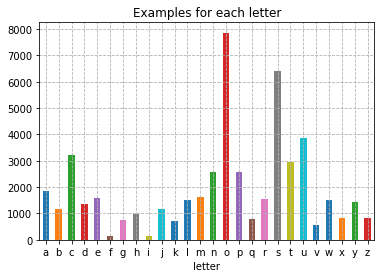

In [7]:
letter_counts.plot(kind='bar', title = "Examples for each letter")
plt.grid(True,ls='--')
plt.xticks(rotation=0)

#### Point (4)
**Record the time necessary to accomplish point 3, do different repartitions of data (use
3-4 different numbers of partitions). Record the new execution times and explain their
behavior.**

We are now interested in studying the execution time to accomplish Point (3) as the number of repartitions of data made by DASK changes. We remind that by default this parameter is chosen to be equal to 2 (we will be considering also this scenario anyways).

In [8]:
df.npartitions

2

In [9]:
partitions = [1,2,5,10,20,30,50,100]  #we also include npartitions=2 to compute its timing

timelist = []
for num in partitions:
    df_tmp = df.repartition(npartitions=num)
    start = time.time()
    letter_counts = df_tmp.groupby(["letter"])["letter"].count().compute()
    end = time.time() - start
    timelist.append(end)
    

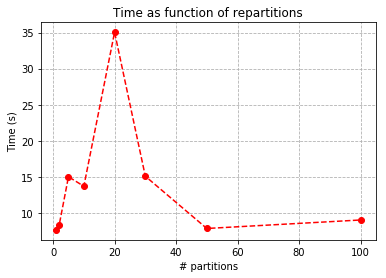

In [10]:
plt.plot(partitions, timelist, "ro--")
plt.title("Time as function of repartitions")
plt.xlabel("# partitions")
plt.ylabel("Time (s)")
plt.grid(True, ls="--")
plt.show()

The number of partitions seems to have little influence in clearly defining a trend for the execution time to count the number of occurences for each letter. This can be seen both by the fact that the values change (even drastically, at times) every time the program is run and because the line we obtain goes up and down in no clear fashion. This is possibly due to the fact that the splitting in the different repartitions happens at random and therefore it is impossible to determine the behaviour _a priori_.

It is indeed a surprise to see such a blatant lack of a predictable behavior; an hypothesis could be that the dataset is not big enough (about 90 MB, everything could have been done locally) to be suitable for a parallel approach: the influence of it gets completely lost in all the random processes happening when parallelizing.

It should be noted that the partitioning happens at random, so it seems sensible that with more of them the running time can be optimized, because every worker will always be operational. An excessively large number, however, would imply great overhead contributions, which could explain why the line seems to be increasing again for more than 50 partitions. 

#### Point (5)
**Filter the data in order to get a subsampled dataset that contains only rows for
character ‘a’ and ‘z’. Print the computation graph and comment the behavior.**

We now trim our dataset to get a subsample only containing letters $a$ and $z$.

In [11]:
mask = ['a','z']
condition = df['letter'].isin(mask)
df_filtered = df[condition]

df_filtered.head()  #checking if the selection worked properly

,letter,label,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
4,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,z,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


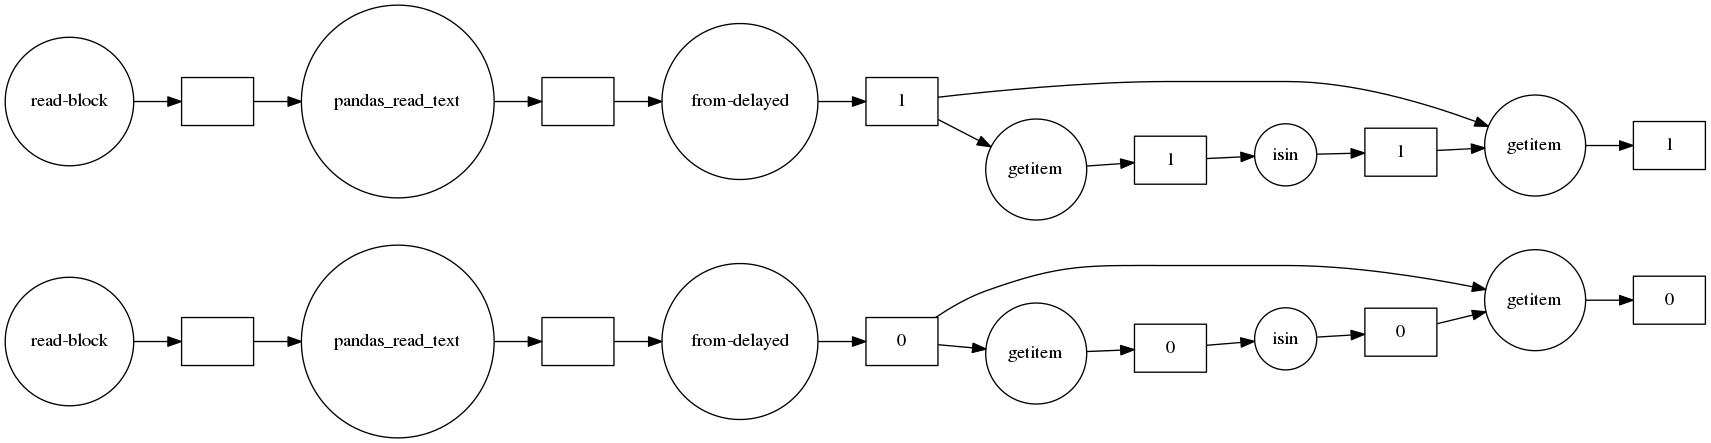

In [12]:
df_filtered.visualize(rankdir='LR')

The chunks in which this graph is divided represent the different number of partitions (in this case equal to 2) and not the number of workers. We can clearly see that in each partition the followed workflow is exactly the same, proceeding in parallel; the indexes 0 and 1 are once again used to label the partitions.

#### Point (6)
**Take the subsampled dataset obtained in point 5 divide it in training (80%) and test
(20%) sets.**

The following cell is used to prepare our trimmed dataset for the Machine Learning classification algorithm: we consider the pixel values as our instances (`X`), while the letter they correspond to acts as a label (`y`). Both have to be converted into a dask array; then we properly split them in training set and test set, using an 80%-20% balance, which is customary in ML. 

In [13]:
X= df_filtered.iloc[:,2:].to_dask_array(True) #all the rows; all the columns but the first two
y= df_filtered["label"].to_dask_array(True)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

#### Point (7)
**Use the MinMaxScaler with IncrementalLearning, MLPClassifier and ParallelPostFit
in order to training and test a simple neural network over the cluster.
Take in consideration the reached accuracy and the execution time.**

The following rescales our data.

In [14]:
#apply the transformer
transformer = MinMaxScaler(feature_range=(0, 1), copy=True)
transformer.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

With the function `MLPClassifier()` we define our classification algorithm; `Incremental()` makes it possible for the estimator to work in parallel, while `ParallelPostFit()` is used to perform predictions, once again in a parallel architecture.

In [15]:
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)


estimator = MLPClassifier(random_state=42, 
                          max_iter=1000, 
                          hidden_layer_sizes=(200, 200), 
                          activation='relu', 
                          solver='adam', alpha=0.0001, 
                          batch_size='auto', 
                          learning_rate_init=0.001, 
                          shuffle=True, 
                          tol=0.0001, 
                          validation_fraction=0.1)

t1 = tic()
clf = Incremental(estimator)
clf.fit(X_train, y_train, classes=[0, 25]) #parallel learning process
preds = ParallelPostFit(estimator=clf.estimator_,scoring='accuracy') #parallel prediction process
t2 = tic()

print("Accuracy: "+str(dask_ml.metrics.accuracy_score(y_test, preds.predict(X_test))))
print("Time: "+str(t2-t1)+"s")
print("Total Time: "+str(t2-tstart)+"s")

Accuracy: 0.9759704251386322
Time: 54.65212369799997s
Total Time: 758.6144808529999s


Per mandare i workers, si usa lo stesso comando `dask-worker 10.190.1.XX:8786 --nprocs 2` ma al posto di XX bisogna inserire il numero del computer a cui si vogliono mandare i workers stessi, che sarebbe lo scheduler. Ogni computer puo' mandare al massimo 4 workers

#### Point (8)
**Repeat from point 1 to point 7 changing the number of workers to 4, 6, 8, 10 (larger
number of workers must be implemented with multiple machines ( >= 6 )).
Compare the results and the times and explain the behavior.**

We now rerun all the operations increasing the number of workers and trying to parallelize the operations using multiple machines. What we wish to focus on is the accuracy reached by the ML classification algorithm in these different scenarioes, the time it takes for the algorithm to run and the total time of running the whole Notebook (used as a global parameter for comparison).

To send workers to a different machine, we again run in the terminal the command

`dask-worker 10.190.1.XX:8786 --nprocs N`

where XX should be substituted by the IP address of the machine we want to send the workers to (the scheduler) and N by the number of workers. Each computer has 4 cores, so for higher values we will need multiple machines: in particular, 6 was obtained using 3 workers from 2 machines, 8 using 4 each and 10 with three machines sending 4+3+3 workers.

In the table below, we summarize the results we obtained. We decided to omit the code portions since they are just repetitions of all the operations performed in the previous points.

|# workers|Accuracy|ML time (s)| Total time (s)
|:---:|:---:|:---:|:---:|
|2  | 0.699 | 8.470 | 111 |
|4  | 0.780|10.260|117|
|6  |0.978|8.072|106|
|8  | 0.978|9.594|109|
|10 |0.976 |10.248 |114|

It should be kept in mind that these values are under extreme variability, due to the fact that parallelization happens by splitting the data at random, sending it to different machines in an unpredictable fashion and re-collecting it when operations have been performed. This process has an intrinsic randomness and several overhead times needed for the machines to communicate between themselves: both factors make it hard to have a precise idea of the trend of the studied quantities. It was deemed useless also to take averages of several trials, because that would have overshadowed this variability.

In general we would expect that the execution times become smaller when the number of workers increases, because there are more machines for computing purposes. It is possible that the limited size of the dataset is playing a role also in this case, making it so that all the random disturbances and flat overheads are more influent than the actual optimization performed in parallelization.

#### Point (9)
**Use the distributed Tensorflow. Use the MinMaxScaler with Convolutional Neural
Network that you can find in the function `def build_deep_cnn_neural_network()` on
the Notebook "Distributed Deep Learning on CPU-GPU". Pay attention to the
input_shape.**

In [16]:
from dask.distributed import Client
from dask_ml.datasets import make_classification
from dask_tensorflow import start_tensorflow

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


We invoke `TensorFlow` and we set the number of workers equal to 4, using only one machine.

In [17]:
client_name = '10.190.1.68:8786'
client = Client(client_name)

tf_spec, dask_spec = start_tensorflow(client, ps=2, worker=2)

client

Client Scheduler: tcp://10.190.1.68:8786 Dashboard: http://10.190.1.68:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.15 GB


We redefine the trimmed dataset which will be used for the classification algorithm in a distributed Convolutional Neural Network.

In [18]:
mask = ['a','z']
condition = df['letter'].isin(mask)
df_filtered = df[condition]

X= df_filtered.iloc[:,2:].values.compute() #all the rows; all the columns but the first two
y= df_filtered["label"].values.compute()

We perform some data preprocessing: the label for letter $z$ needs to be changed from 25 to 1 (because of the algorithm) and since we are employing a CNN, the columns representing the pixels need to be reshaped from a $1\times784$ array to a $28\times28$ matrix. 

In [19]:
y[y==25] = 1

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

transformer = MinMaxScaler(feature_range=(-1,1),copy=True)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

X_train, X_test = X_train.reshape((len(X_train), 28,28, 1)),  X_test.reshape((len(X_test), 28,28, 1))

Mixture of types in 'arrays'. Falling back to scikit-learn.


In [20]:
def build_deep_cnn_neural_network():
    
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3,3), name='c', strides=(1, 1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', name='d'))
    model.add(Dense(32, activation='relu', name='d1'))
    model.add(Dense(1, activation='sigmoid', name='d2'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

With the implemented function, we run the algorithm for 10 epochs.

In [21]:
model = build_deep_cnn_neural_network()

model.fit(X_train, y_train, verbose=1, epochs=10, batch_size=32)
#print(model.predict(X_test))
scores = model.evaluate(X_test,y_test, verbose=1)
print("Accuracy: "+str(scores[1]))

Epoch 1/10
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0895 - acc: 0.9597
Epoch 2/10
2161/2161 [==============================] - 6s 3ms/step - loss: 0.0041 - acc: 0.9991
Epoch 3/10
2161/2161 [==============================] - 6s 3ms/step - loss: 8.7249e-04 - acc: 1.0000
Epoch 4/10
2161/2161 [==============================] - 6s 3ms/step - loss: 3.1559e-04 - acc: 1.0000
Epoch 5/10
2161/2161 [==============================] - 6s 3ms/step - loss: 1.7441e-04 - acc: 1.0000
Epoch 6/10
2161/2161 [==============================] - 6s 3ms/step - loss: 1.2659e-04 - acc: 1.0000
Epoch 7/10
2161/2161 [==============================] - 6s 3ms/step - loss: 9.6107e-05 - acc: 1.0000
Epoch 8/10
2161/2161 [==============================] - 6s 3ms/step - loss: 7.5281e-05 - acc: 1.0000
Epoch 9/10
2161/2161 [==============================] - 6s 3ms/step - loss: 6.1822e-05 - acc: 1.0000
Epoch 10/10
541/541 [==============================] - 0s 555us/step
Accuracy: 0.9963031423290203


We obtain extremely satisfactory values for accuracies; it is somewhat alarming to obtain so many 1s (perfect accuracy), but these values are computed on the test set, so there should be no risk of overfitting.

The processing times are all well below 10 seconds.